In [4]:
!pip install statsmodels

  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/44/d6/80df1bbbfcdc50bff4152f43274420fa9856d56e234d160d6206eb1f5827/statsmodels-0.14.5-cp313-cp313-win_amd64.whl.metadata
  Obtaining dependency information for patsy>=0.5.6 from https://files.pythonhosted.org/packages/f1/70/ba4b949bdc0490ab78d545459acd7702b211dfccf7eb89bbc1060f52818d/patsy-1.0.2-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.6 MB 853.6 kB/s eta 0:00:12
   ---------------------------------------- 0.1/9.6 MB 1.1 MB/s eta 0:00:09
   - -------------------------------------- 0.3/9.6 MB 1.8 MB/s eta 0:00:06
   -- ------------------------------------- 0.6/9.6 MB 3.4 MB/s eta 0:00:03
   ------ --------------------------------- 1.7/9.6 MB 7.0 MB/s eta 0:00:02
   ----------- ---------------------------- 2.7/9.6 MB 9.


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Importing libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
# Download prices (MSFT vs NASDAQ) and compute daily returns

tickers = ["MSFT", "^IXIC"] # NASDAQ Composite
data = yf.download(tickers, period="3y", auto_adjust=True)

# With auto_adjust=True, 'Close' is already adjusted
prices = data["Close"].rename(columns={"^IXIC": "NASDAQ"})

rets = prices.pct_change().dropna()
x = rets[["NASDAQ"]].values  # 2D array for sklearn
y = rets[["MSFT"]].values   # 1D target

[*********************100%***********************]  2 of 2 completed


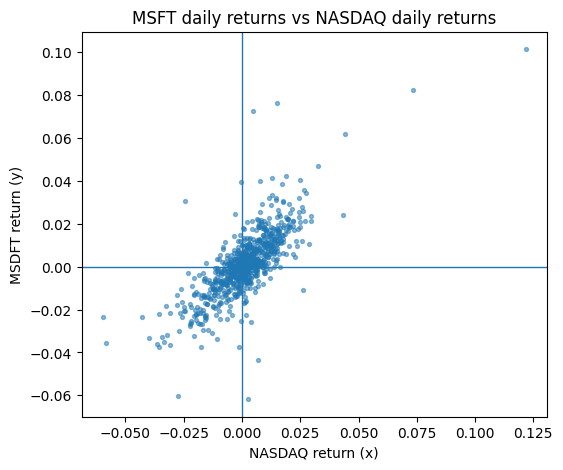

In [3]:
# Scatter plot

plt.figure(figsize=(6,5))
plt.scatter(rets["NASDAQ"], rets["MSFT"], s=8, alpha=0.5)
plt.title("MSFT daily returns vs NASDAQ daily returns")
plt.xlabel("NASDAQ return (x)")
plt.ylabel("MSDFT return (y)")
plt.axhline(0, lw=1); plt.axvline(0, lw=1)
plt.show()

In [4]:
# Fit linear regression with scikit-learn

lr = LinearRegression(fit_intercept=True)
lr.fit(x,y)

beta = (lr.coef_[0]).item()
alpha = (lr.intercept_).item()
r2 = lr.score(x,y)

beta, alpha, r2

(0.8909866081363417, 0.00028242482656478524, 0.5972720672040444)

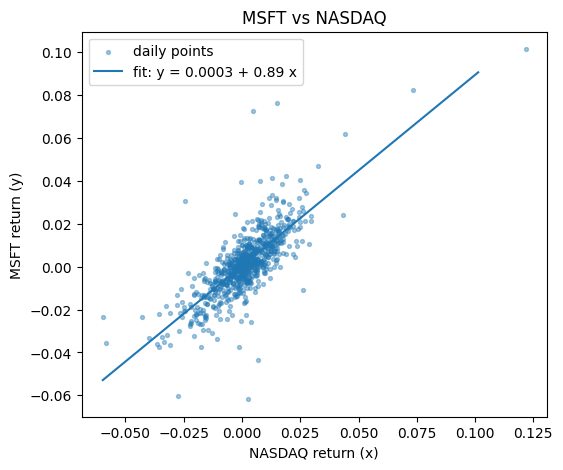

In [5]:
# Plot fitted line over the scatter 

xx = np.linspace(rets["NASDAQ"].min(), rets["MSFT"].max(), 200)
yy = alpha + beta * xx

plt.figure(figsize=(6,5))
plt.scatter(rets["NASDAQ"], rets["MSFT"], s=8, alpha=0.4, label="daily points")
plt.plot(xx, yy, label=f"fit: y = {alpha:.4f} + {beta:.2f} x")
plt.title("MSFT vs NASDAQ")
plt.xlabel("NASDAQ return (x)")
plt.ylabel("MSFT return (y)")
plt.legend()
plt.show()

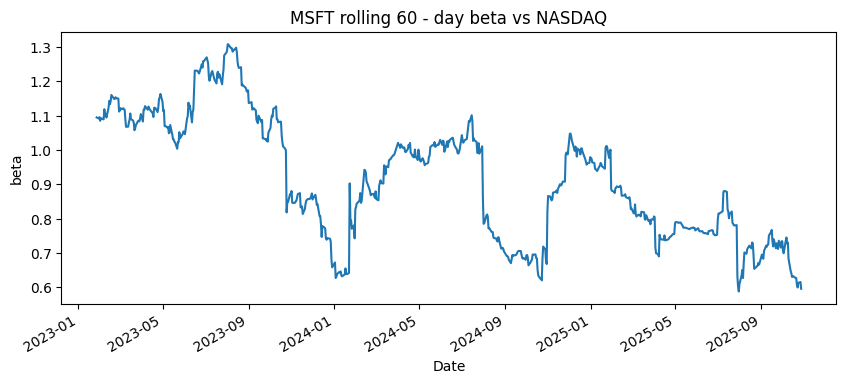

In [6]:
# Rolling beta

window = 60 # trading days aprox. 3 months
rolling_beta = (
    rets["MSFT"].rolling(window).cov(rets["NASDAQ"]) / rets["NASDAQ"].rolling(window).var()
)

rolling_beta.plot(figsize=(10,4), title=f"MSFT rolling {window} - day beta vs NASDAQ")
plt.ylabel("beta")
plt.show()

In [10]:
# Out-of-sample check (train/test split)

split = int(len(rets)*0.8)
x_tr, x_te = x[:split], x[split:]
y_tr, y_te = y[:split], y[split:]

lr2 = LinearRegression().fit(x_tr, y_tr)
r2_train = lr2.score(x_tr, y_tr)
r2_test = lr2.score(x_te, y_te)
beta_oos, alpha_oos = (lr2.coef_[0]).item(), (lr2.intercept_).item()

#r2_train, r2_test, beta_oos, alpha_oos
print(f"R2 trainning: {r2_train}\n")
print(f"R2 test: {r2_test}\n")
print(f"Beta OOS: {beta_oos}\n")
print(f"Alpha OOS trainning: {alpha_oos}\n")

R2 trainning: 0.5965176939816026

R2 test: 0.5822664540923514

Beta OOS: 0.9569406173376335

Alpha OOS trainning: 0.00015418924402123757

